In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

tsawebsite = 'https://www.tsa.gov/coronavirus/passenger-throughput'

# Read data from TSA Website
webpage = Request(tsawebsite, headers={'User-Agent': 'Mozilla/5.0 Chrome/28.0.1464.0'})
sauce = str(urlopen(webpage).read())
sauce = sauce.encode('utf-8', 'ignore').decode('utf-8')
soup = BeautifulSoup(sauce,'html.parser')

# Parse data looking for relevant table
data = soup.find('table')
data = data.find_all('td')
data = [element.get_text() for element in data]
data = data[3:]

# Isolate the 3 relevant columns of the table
dates = data[0::3]
now = [int(element.replace(',','')) for element in data[1::3]]
before = [int(element.replace(',','')) for element in data[2::3]]

# Make variables for results
today = now[0]

# Final message to be sent
string_result = 'TSA Flier Analysis \n Today: {:,} fliers'.format(today)
print(string_result)

TSA Flier Analysis 
 Today: 268,867 fliers


In [2]:
dates_dt = [dt.datetime.strptime(date, '%m/%d/%Y') for date in dates]
dates_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

base_data = pd.DataFrame({
    'Weekday':[dates_dict[date.weekday()] for date in dates_dt],
    'Now':now,
    'Before':before
},index=dates_dt)

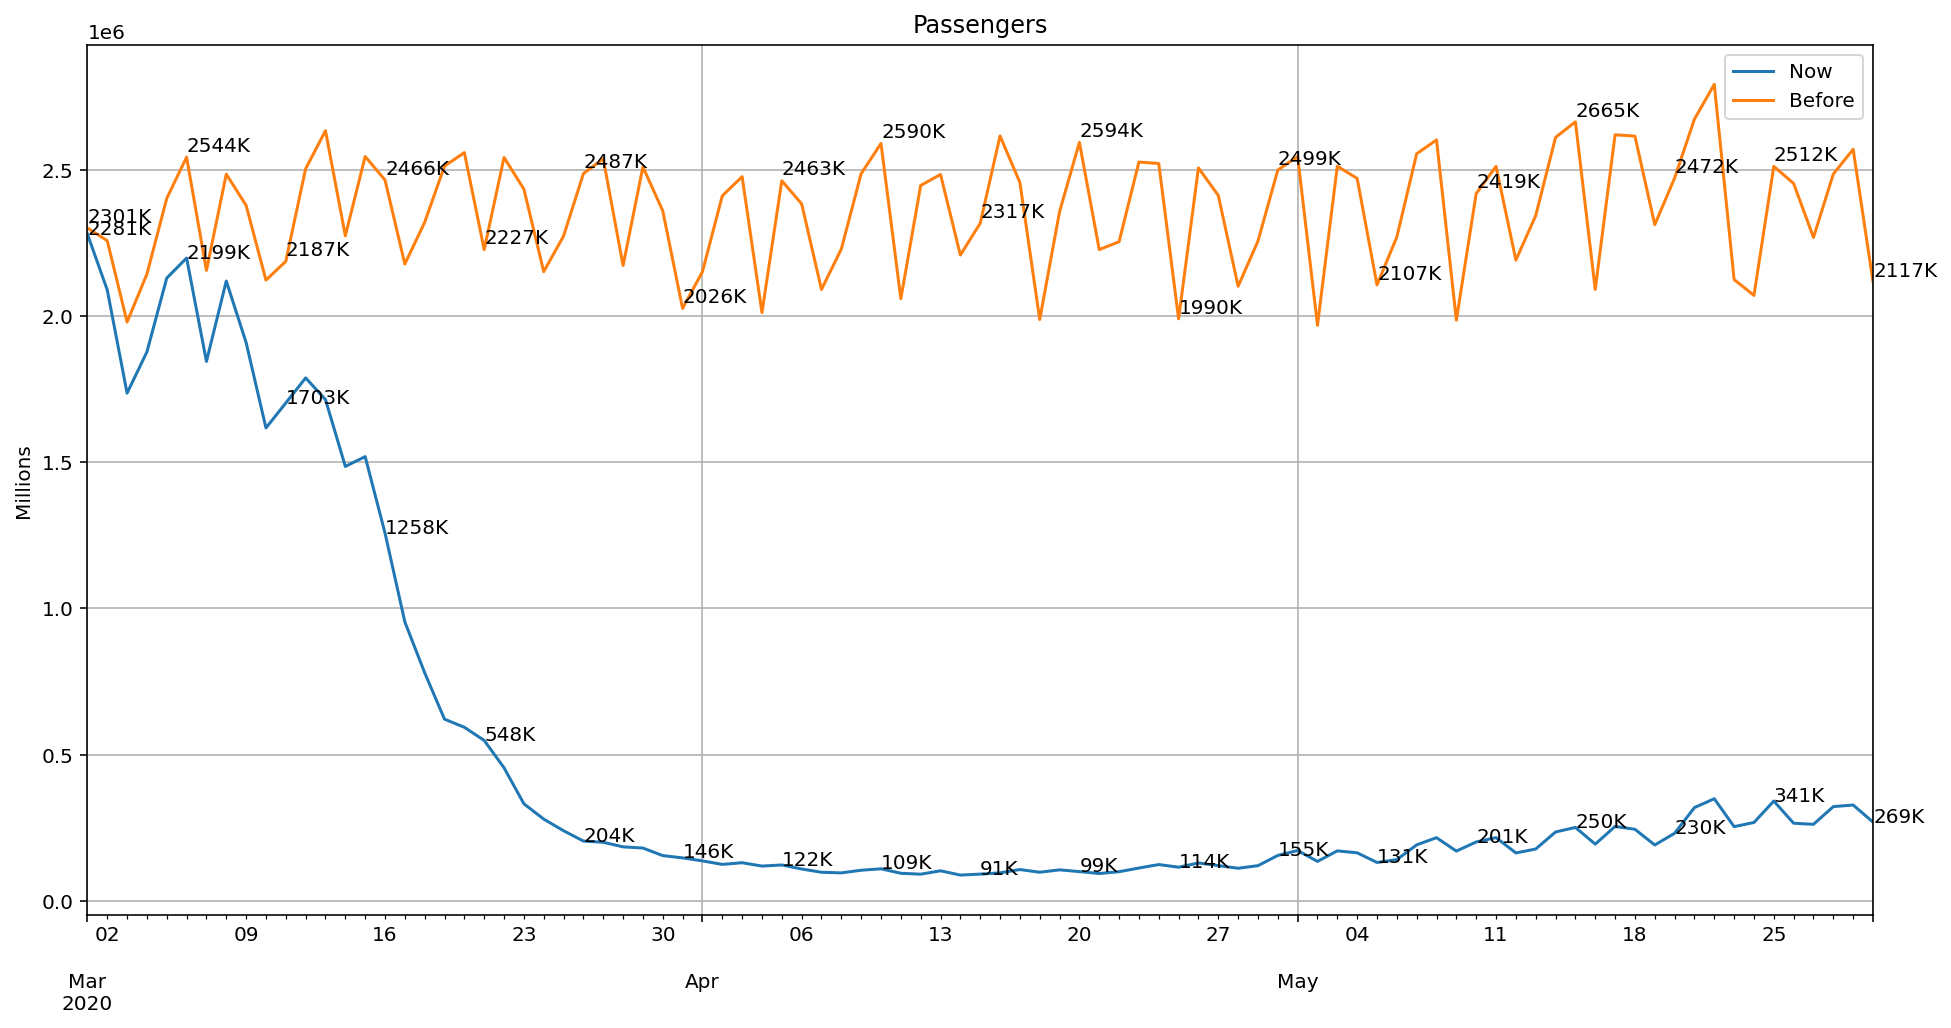

In [3]:
passengers = base_data.plot.line(y=['Now','Before'], figsize=(16,8), grid=True, title='Passengers')
passengers.set_ylabel("Millions")

for i in range(0,len(base_data['Now'])+1,5):
    passengers.annotate("{:.0f}{}".format(base_data['Now'][i]/1000,'K'),(base_data.index[i],base_data['Now'][i]+1))
    passengers.annotate("{:.0f}{}".format(base_data['Before'][i]/1000,'K'),(base_data.index[i],base_data['Before'][i]+20000))
    

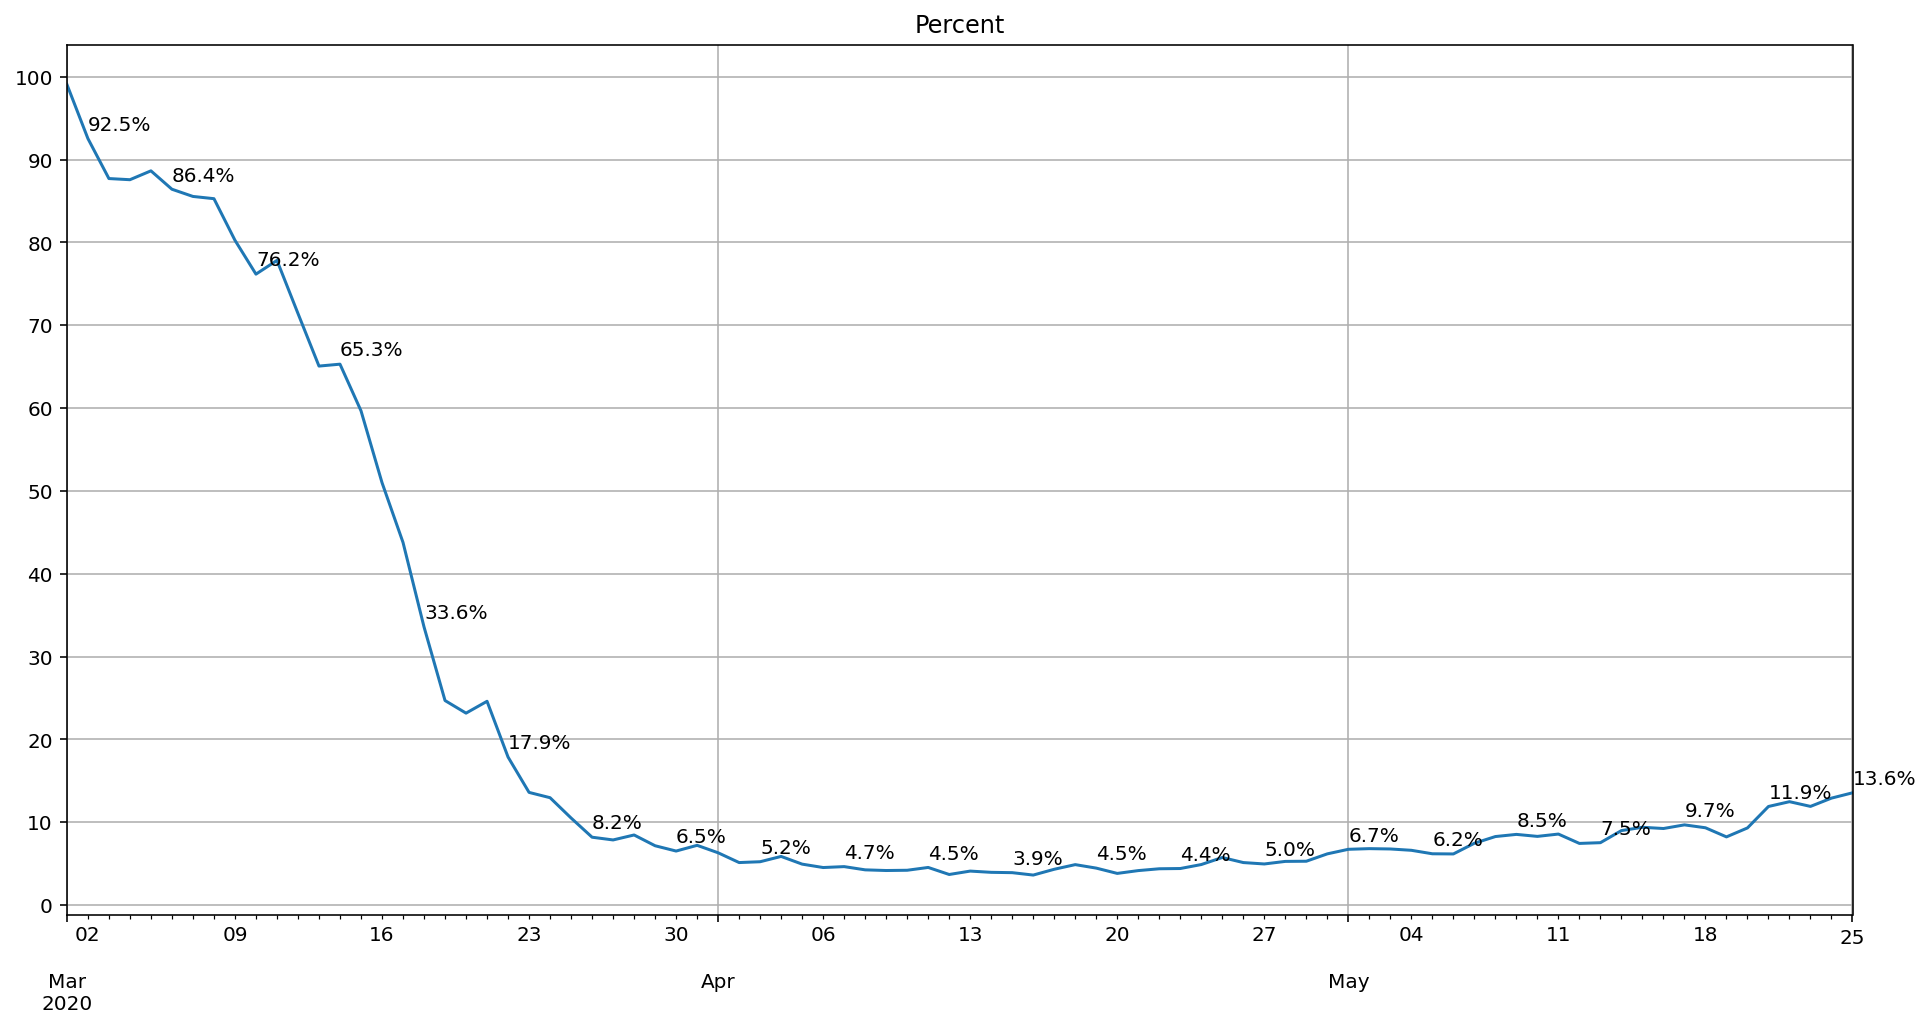

In [6]:
PercentOfLastYear = round(((base_data['Now']/base_data['Before'])*100),2)
percent_last_year = PercentOfLastYear.plot.line(figsize=(16,8), grid=True, title='Percent',yticks=range(0,110,10))

for x in range(0,len(PercentOfLastYear)+1,4):
    percent_last_year.annotate("{:.1%}".format(PercentOfLastYear[x]/100),(PercentOfLastYear.index[x],PercentOfLastYear[x]+1))
    

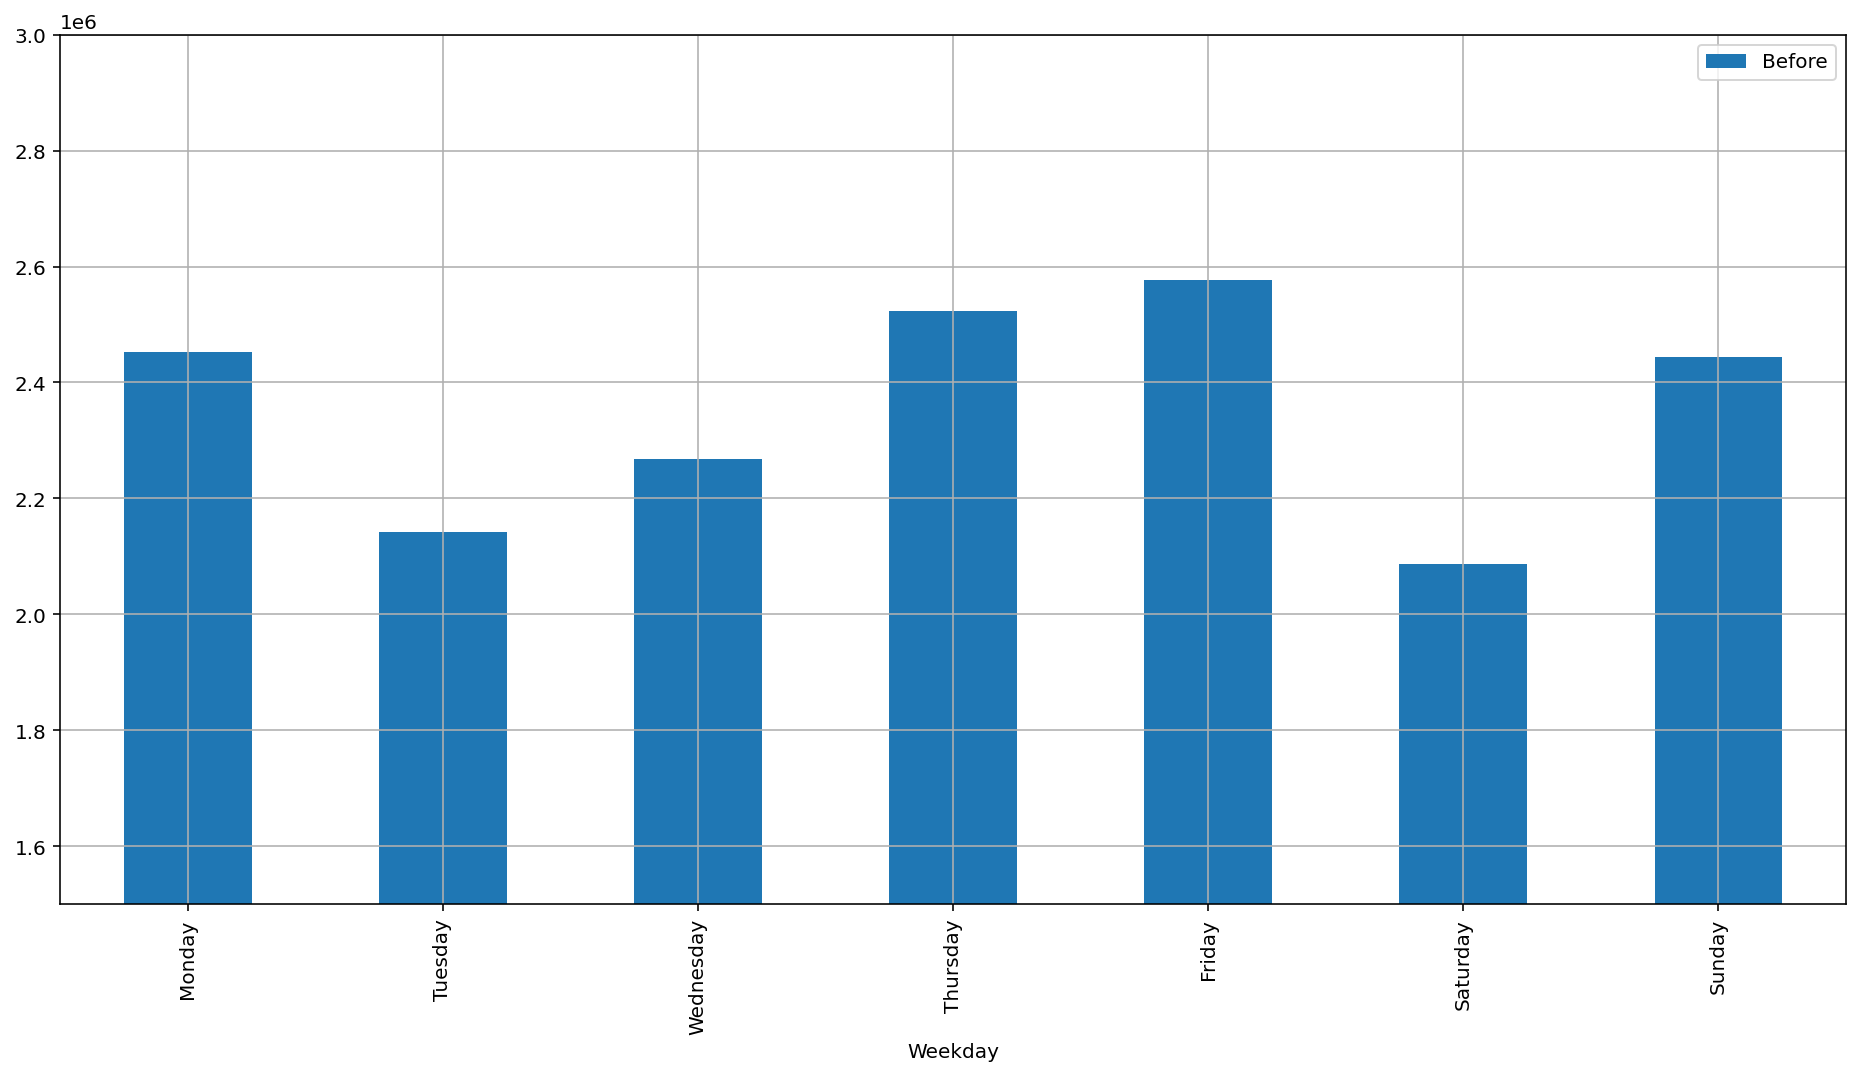

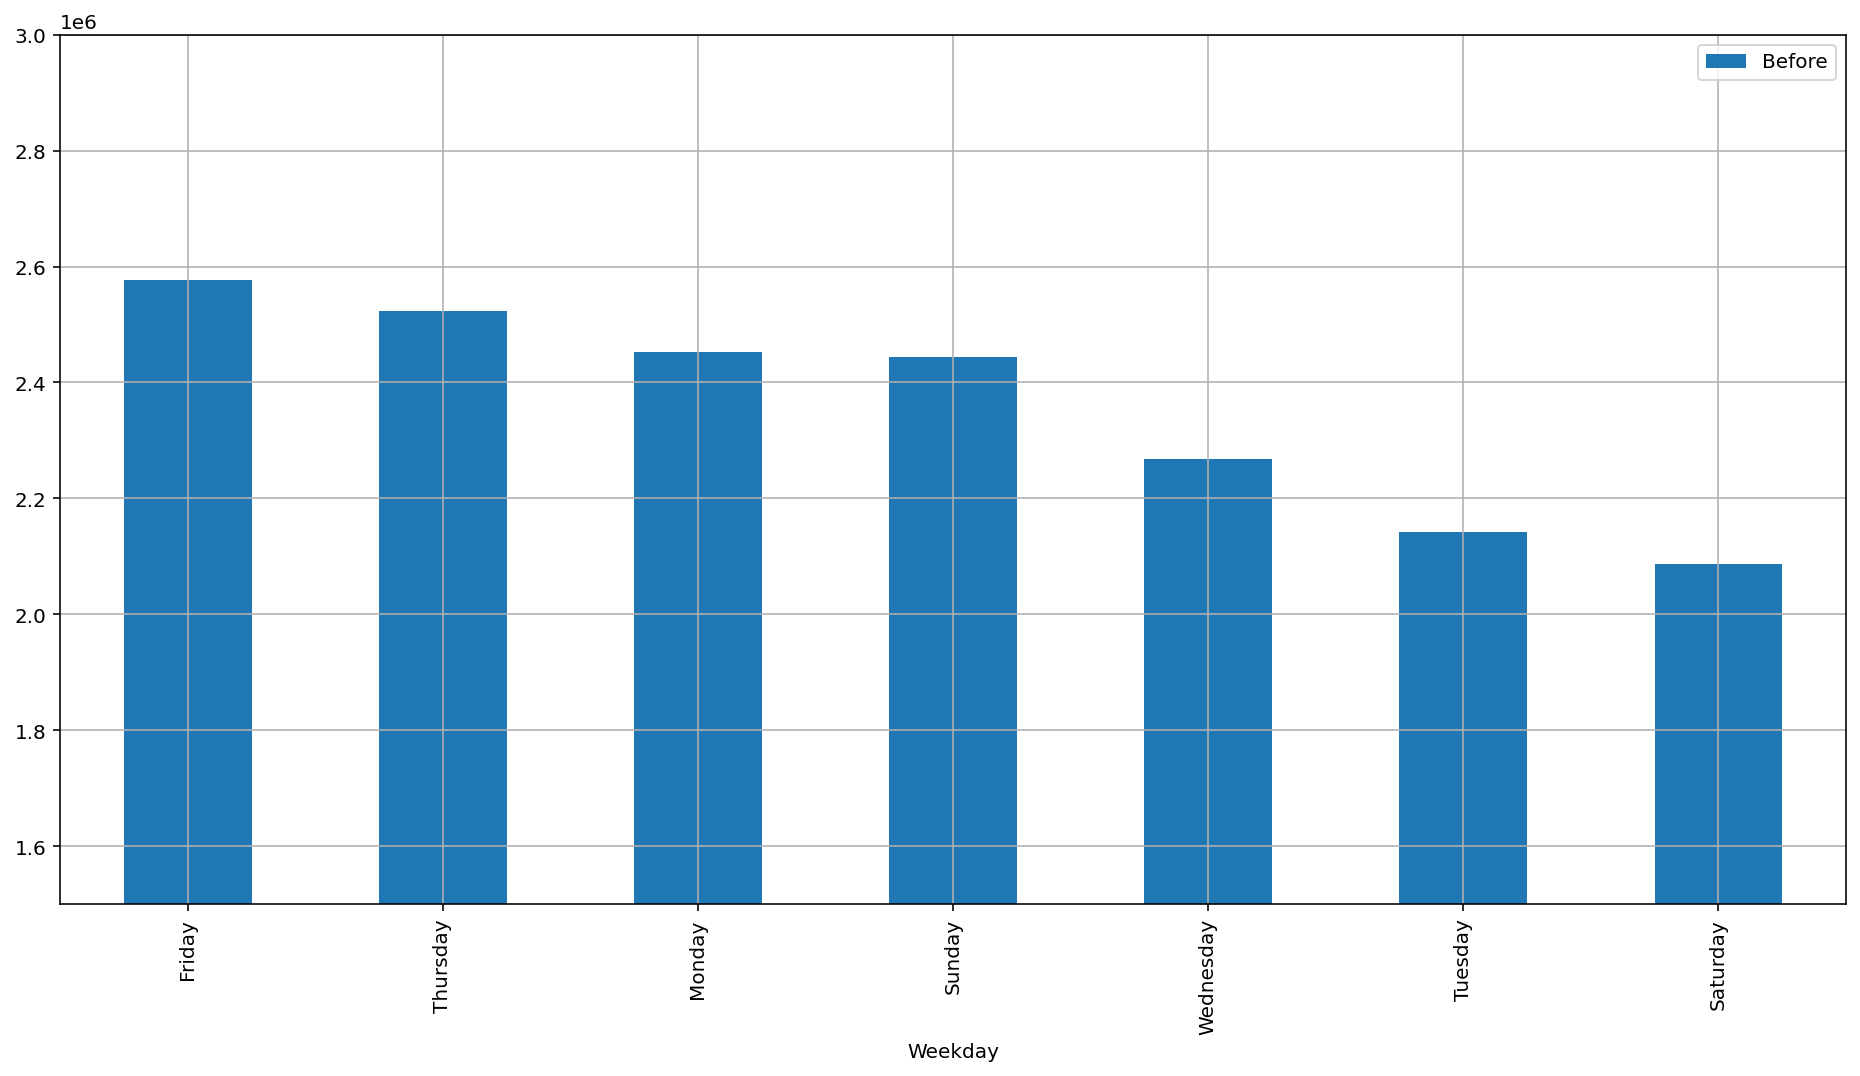

In [61]:
weekday = base_data.groupby('Weekday').mean()
weekday = weekday.reindex(dates_dict.values())
weekday.plot.bar(y='Before',grid=True,figsize=(16,8),ylim=(1500000,3000000))

highestDay = weekday.sort_values(ascending=False,by='Before')
highestDay.plot.bar(y='Before',grid=True,figsize=(16,8),ylim=(1500000,3000000))

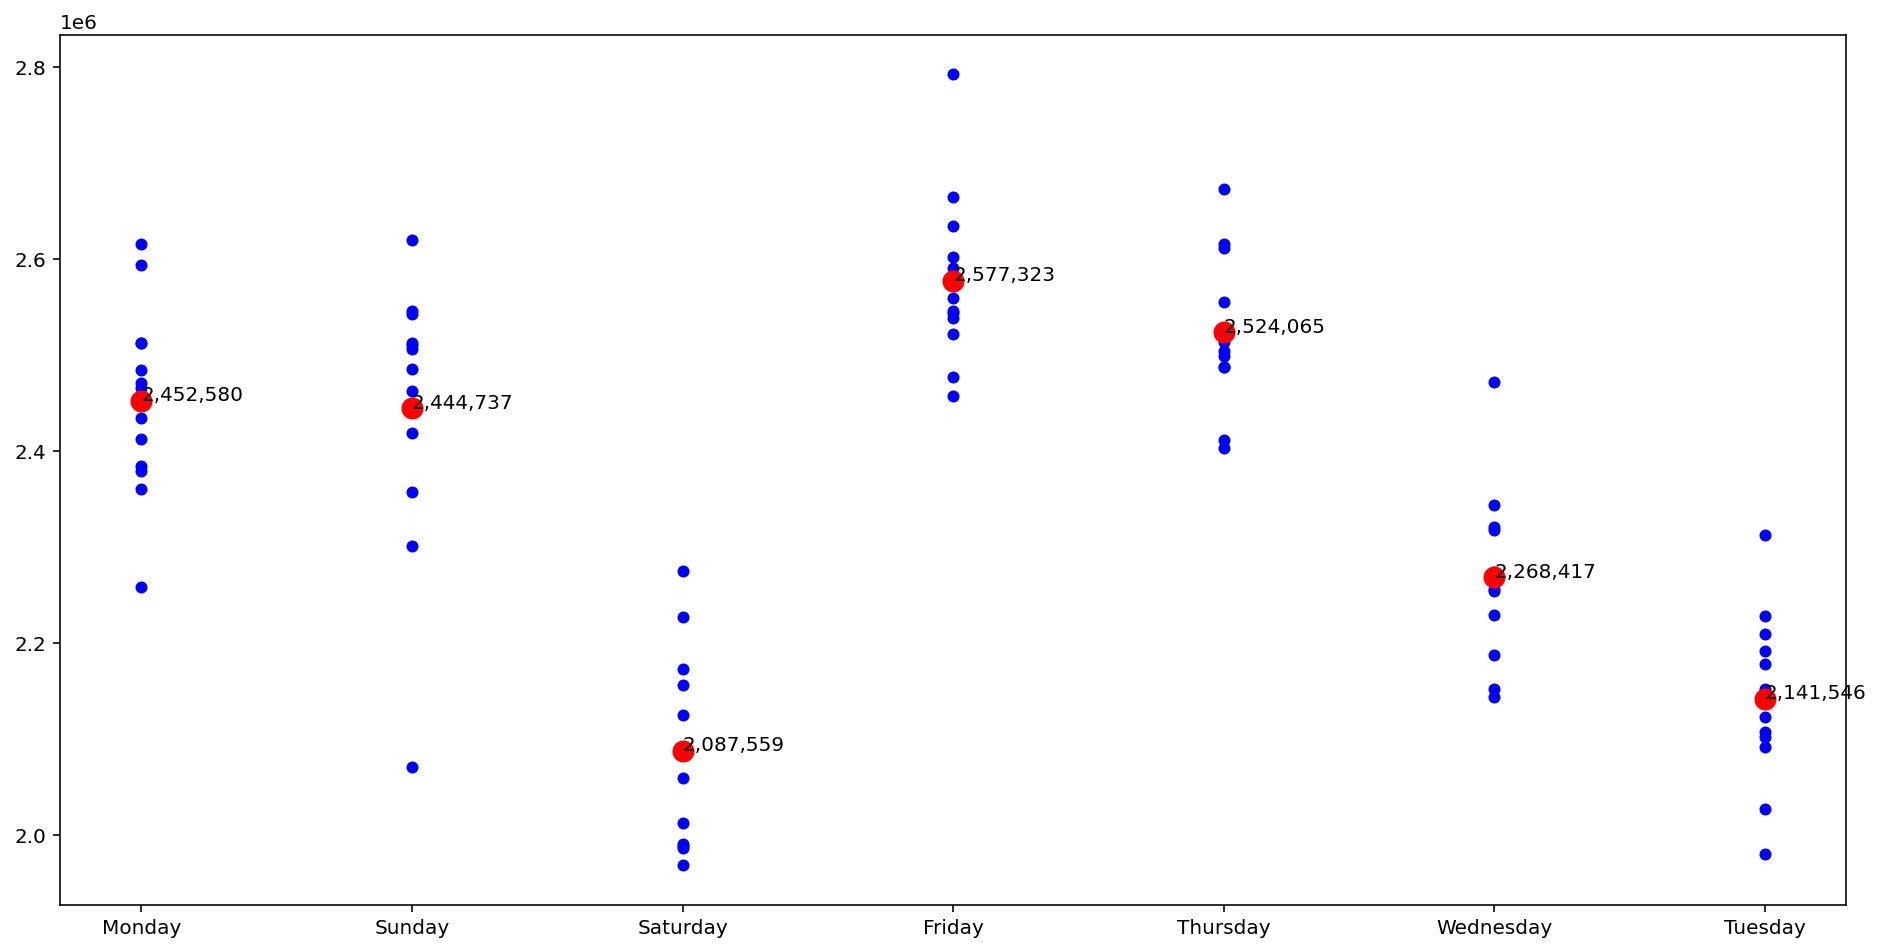

In [9]:
plt.figure(figsize = (16,8))
plt.scatter(base_data['Weekday'], base_data['Before'], c = 'blue', s = 25)
plt.scatter(weekday.index, weekday['Before'], c = 'red', s = 100)

for x in weekday.index:
    plt.annotate('{:,}'.format(int(weekday.loc[x]['Before'])),(x,weekday.loc[x]['Before']))

In [16]:
# Rolling weekly average
# Change per week or month
# Std based on previous figures(mean/std)
# Average per day of week compared to last year. Passengers and %
# line graph per week
# graph to and from bottom
# variations % wise
mpl.matplotlib_fname()

'/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'